## [Question Studied]
 Our research team hold a question about U.S. national competitiveness. Naturally, we thought about labor aged group population, which could be illustrated as the source of the national competitiveness. So it was quite curious that the mortality of the United States of America. We have believed that the mortality would be comparably different by the geographical location. Also, we assumed that the average of the mortality of labor aged group would be around 10 people per a week.

## [Technical Aspects]
 Formal description of the population of interest<br>: The mortality of 122 cities in the United States of America from 1962 to 2013.<br>
 Formal definition of the variable you will study<br>: The number of labor aged group death in each state of the USA.<br>
 Formal statement of the four-step process for data analysis<br>: This part will be mentioned below.<br>
 Your plan for selecting a simple random sample from your population<br>: After the removal of outliers, we will select random 40 cities.<br>
 Formal statement of the data analysis using mean and standard deviation of the sampled data<br>: This part also will be metioned below.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
DataSet = pd.read_csv('/Users/Daniel/Downloads/Trun_dat.csv')
DataSet.columns

Index([u'Unnamed: 0', u'Week_date', u'State', u'City', u'Labor'], dtype='object')

In [11]:
del DataSet['Unnamed: 0']

In [12]:
Trun_dat = DataSet

In [13]:
per_state = Trun_dat.pivot_table('Labor',index='Week_date',columns='State')

In [14]:
As_Whole = per_state.sum(axis=1)
per_state["USA"] = As_Whole

## [The summary of the observatory study]
(1) Data: (a) The data has been collected through 122 Cities Mortality Reposting System from 1962 to 2013 in the United States of America. Since the data are fairly well categorized by cities, ages and weeks, our research team didn't doubt if there would be better dataset for the population of interest. (b) We provide the separate excel .csv file. (c) Also, you can see the graphical representation of the data below.

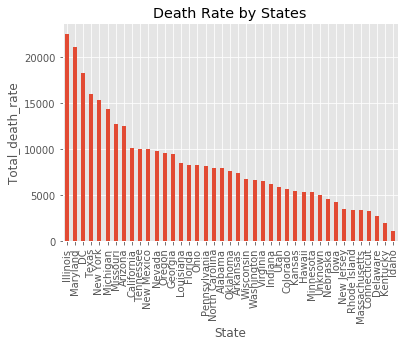

In [15]:
plt.style.use('ggplot')
death_by_state = np.sum(per_state, axis=0)
For_graph =  death_by_state.sort_values(ascending=False)[1:len(death_by_state)]
For_graph.plot(kind='bar',title='Death Rate by States')
plt.ylabel('Total_death_rate')
plt.show()

## (2) Provide the four-step process of the data analysis:
<br>(a) State : How the U.S. labor aged group mortality would be described in geographical distribution?
<br>(b) Plan : First, we are going to remove some outliers. We will examine the variations through graphs and numerical summaries. It should be shown as a map plot, because this is a variable which changes by geographical location.
<br>(c) Solve :
<br>  a. Provide a map plot.
<br>  b. Provide the mean and standard deviation of the dataset, and the five-number summary(minimum value, quartile Q1, median, quartile Q3, maximum value).
<br>(d) Conclusion : 

<br>(Data source : http://data.gov/)

# Outlier Removal

In [17]:
def reject_outliers(data):
    m=1.5
    Q1 = data.quantile(q= 0.25)
    Q3 = data.quantile(q= 0.75)
    IQR = Q3-Q1
    return data[(data > Q1 - 1.5 * IQR) & (data < Q3 + 1.5 * IQR)]

USA = per_state['USA']
Illi = per_state['Illinois']
Maryl = per_state['Maryland']
DC = per_state['DC']
Texas = per_state['Texas']
New_york = per_state['New York']


m_USA = reject_outliers(USA)
m_Illi = reject_outliers(Illi)
m_Maryl = reject_outliers(Maryl)
m_DC = reject_outliers(DC)
m_Texas = reject_outliers(Texas)
m_New_york = reject_outliers(New_york)

print len(USA)
print len(m_USA)

2858
2850


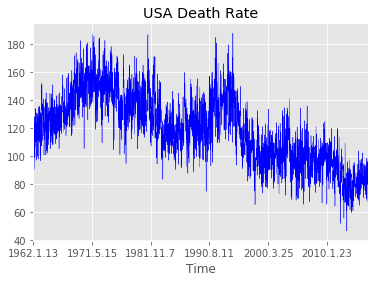

In [18]:
m_USA.plot(kind='line', linewidth=0.4, color='b')
#USA.plot(kind='line', linewidth=0.4, color='r')
plt.xlabel("Time")
plt.title("USA Death Rate")
plt.show()

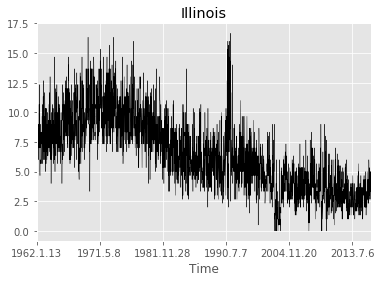

In [19]:
m_Illi.plot(kind='line', linewidth=0.4, color='black')
plt.xlabel("Time")
plt.title("Illinois")
plt.show()

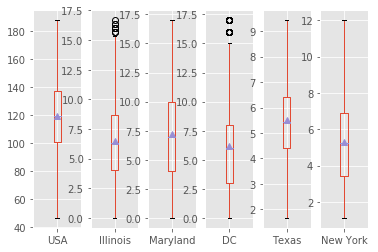

In [20]:
box_usa = pd.DataFrame(m_USA)
box_Illi = pd.DataFrame(m_Illi)
box_Maryl = pd.DataFrame(m_Maryl)
box_DC = pd.DataFrame(m_DC)
box_Texas = pd.DataFrame(m_Texas)
box_New_york = pd.DataFrame(m_New_york)
#
plt.subplot(161)
box_usa.boxplot(showmeans=True)
#
plt.subplot(162)
box_Illi.boxplot(showmeans=True)
#
plt.subplot(163)
box_Maryl.boxplot(showmeans=True)
#
plt.subplot(164)
box_DC.boxplot(showmeans=True)
#
plt.subplot(165)
box_Texas.boxplot(showmeans=True)
#
plt.subplot(166)
box_New_york.boxplot(showmeans=True)


plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('/Users/daniel/Shp/st99_d00/st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density

For_map = per_state.sum(axis=0).round(2).to_dict()
popdensity = For_map
For_map['Alaska'] = 0
For_map['Montana'] = 0
For_map['North Dakota'] = 0
For_map['South Dakota'] = 0
For_map['Maine'] = 0
For_map['New Hampshire'] = 0
For_map['Vermont'] = 0
For_map['Wyoming'] = 0
For_map['West Virginia'] = 0
For_map['South Carolina'] = 0
For_map['Mississippi'] = 0

# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 45000 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Death Rate by States')
plt.show()

ImportError: No module named basemap

## (3) Discussion of the shape of your data
: The USA Death Rate graph appears that it seems like showing a tendency of having decreased with the time series since 1970s. On the other hand, the data of Illinois show significant outliers. According to Wikipedia, there was a severely catastrophic tornado disaster at Illinois in 1990.<br>

The boxplot tells there are outliers in Illinois and DC data. Also, mostly, boxplots of each state seems right skewd. Maybe that of Texas is comparably balanced than that of others.<br>

Except the natural disaster at Illinois, at Texas and Marlyand appears dark red which means they have comparably high death rate.
## (4) Calculate and report the sample mean and standard deviation
[Sample]<br>
mean:<br>
standard deviation:<br>